In [ ]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  !pip install --upgrade fastai timm kaggle -qq
  base_folder = Path('/content/drive/MyDrive/data')
  data_folder = Path('/content/drive/MyDrive/AML/Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-optimize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, make_scorer, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from skopt import BayesSearchCV
from joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

In [ ]:
train_path = '/content/drive/MyDrive/AML/Data/train.csv'
test_path = '/content/drive/MyDrive/AML/Data/test.csv'

In [ ]:
training_data = pd.read_csv(train_path)
testing_data = pd.read_csv(test_path)

In [ ]:
training_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
testing_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

# EDA

In [ ]:
training = training_data.iloc[:,2:len(training_data)]
testing = testing_data.iloc[:,2:len(testing_data)]

## Listing non int attributes

In [ ]:
print("Gender: ",training['Gender'].unique())
print('Customer Type: ', training['Customer Type'].unique())
print('Type of Travel: ',training['Type of Travel'].unique())
print('Class: ',training['Class'].unique())
print('satisfaction: ', training['satisfaction'].unique())


Gender:  ['Male' 'Female']
Customer Type:  ['Loyal Customer' 'disloyal Customer']
Type of Travel:  ['Personal Travel' 'Business travel']
Class:  ['Eco Plus' 'Business' 'Eco']
satisfaction:  ['neutral or dissatisfied' 'satisfied']


## Converting Non int to Int


In [ ]:
# Gender
training['Gender'] = training['Gender'].map({'Male': 0, 'Female': 1})
testing['Gender'] = testing['Gender'].map({'Male': 0, 'Female': 1})

# Customer Type
training['Customer Type'] = training['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})
testing['Customer Type'] = testing['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})

# Type of Travel
training['Type of Travel'] = training['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})
testing['Type of Travel'] = testing['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})

# Class
training['class_eco'] = (training['Class'] == 'Eco').astype(int)
training['class_eco_plus'] = (training['Class'] == 'Eco Plus').astype(int)

testing['class_eco'] = (testing['Class'] == 'Eco').astype(int)
testing['class_eco_plus'] = (testing['Class'] == 'Eco Plus').astype(int)

# Satisfaction
training['satisfaction'] = training['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
testing['satisfaction'] = testing['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [ ]:
training = training.drop('Class', axis=1)
testing = testing.drop('Class', axis=1)

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Customer Type'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Type of Travel'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>],
       [<Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center':

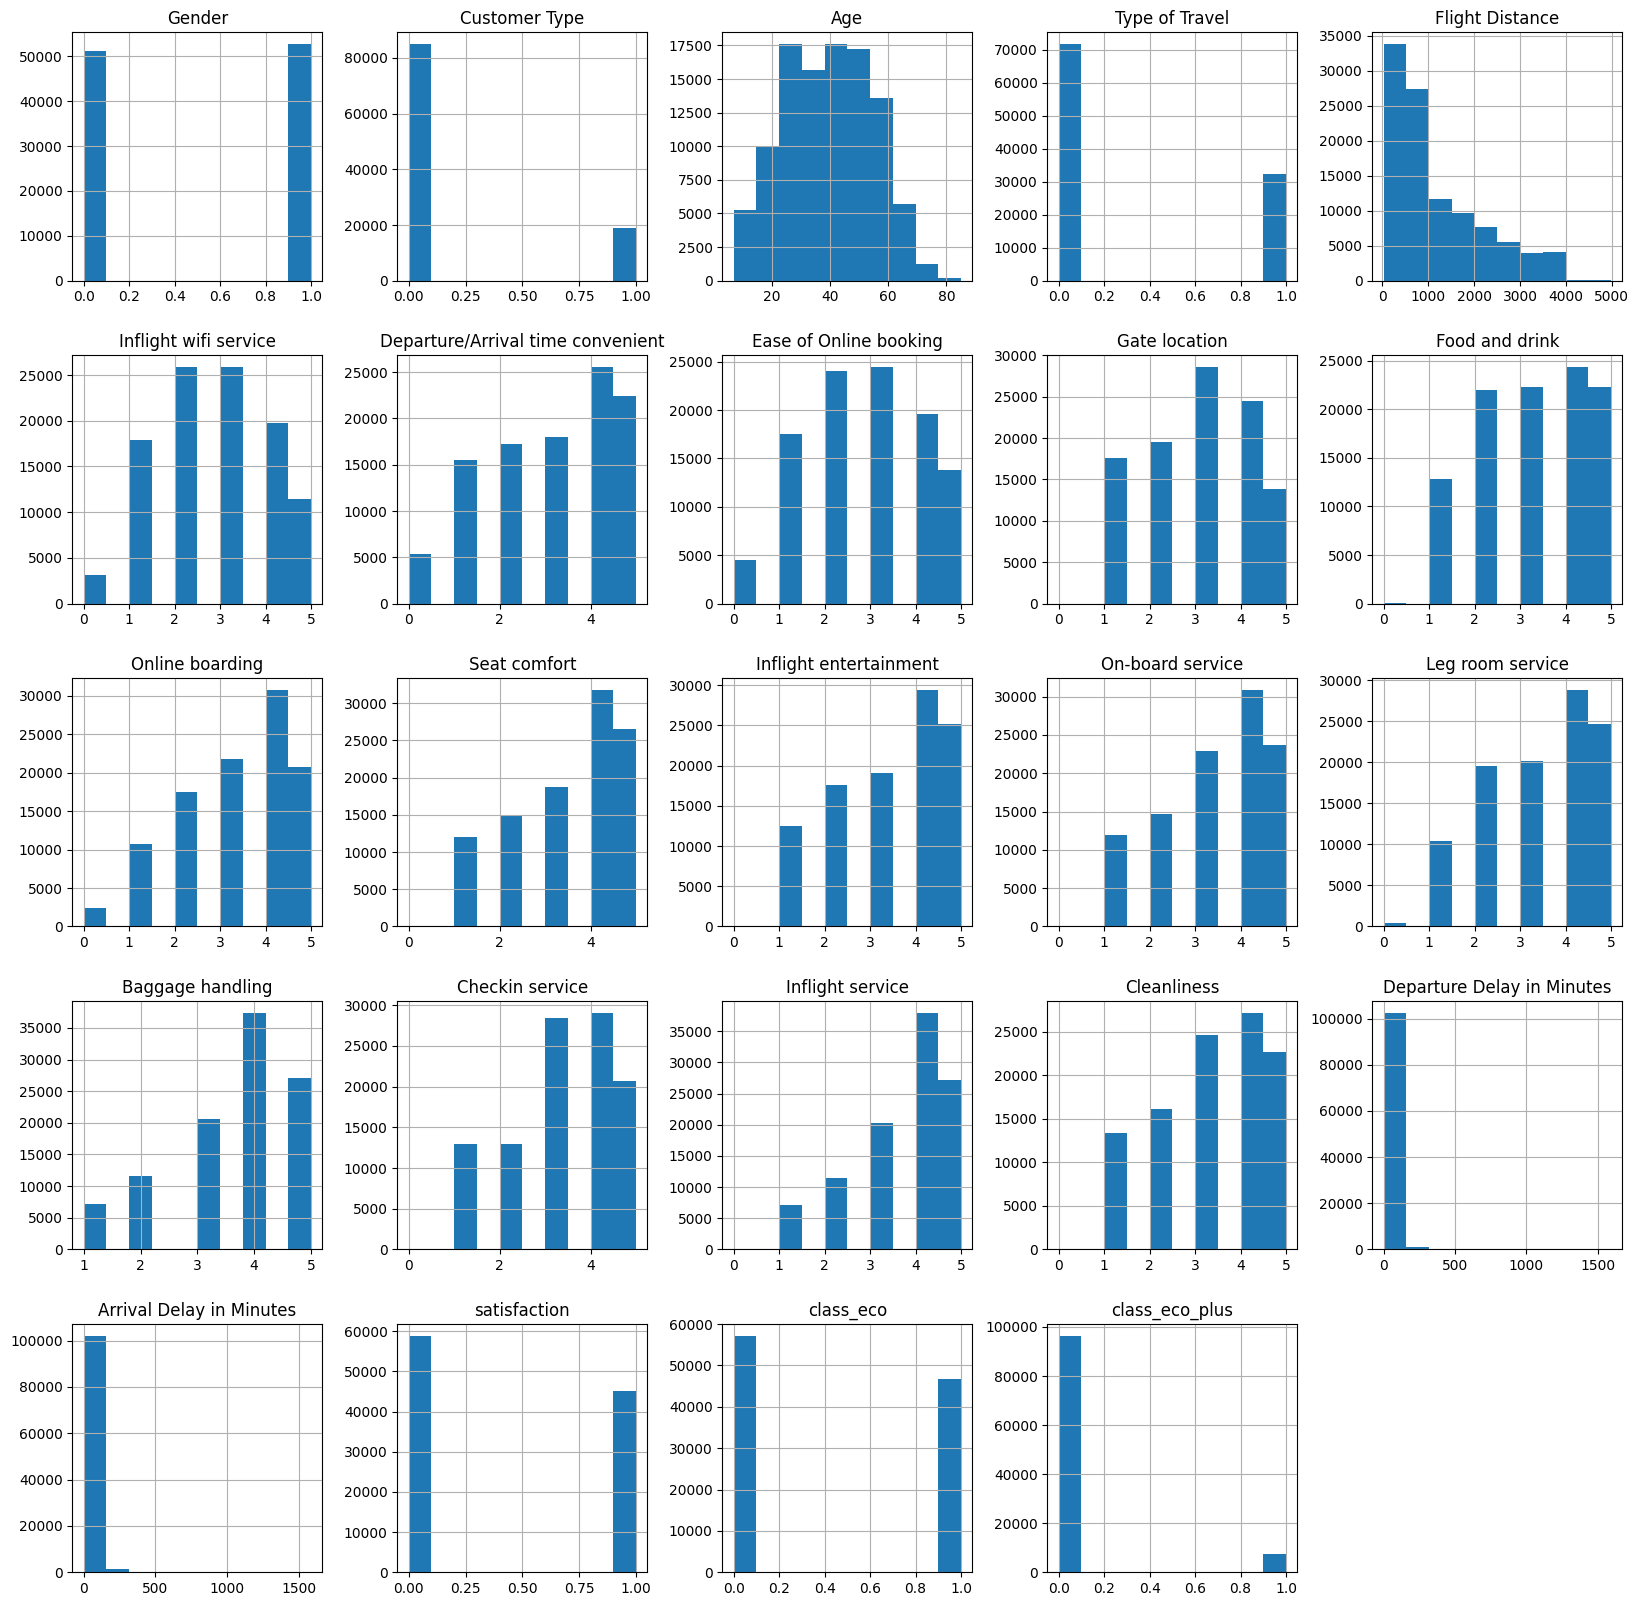

In [ ]:
training.hist(figsize = (20,20))

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Customer Type'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Type of Travel'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>],
       [<Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center':

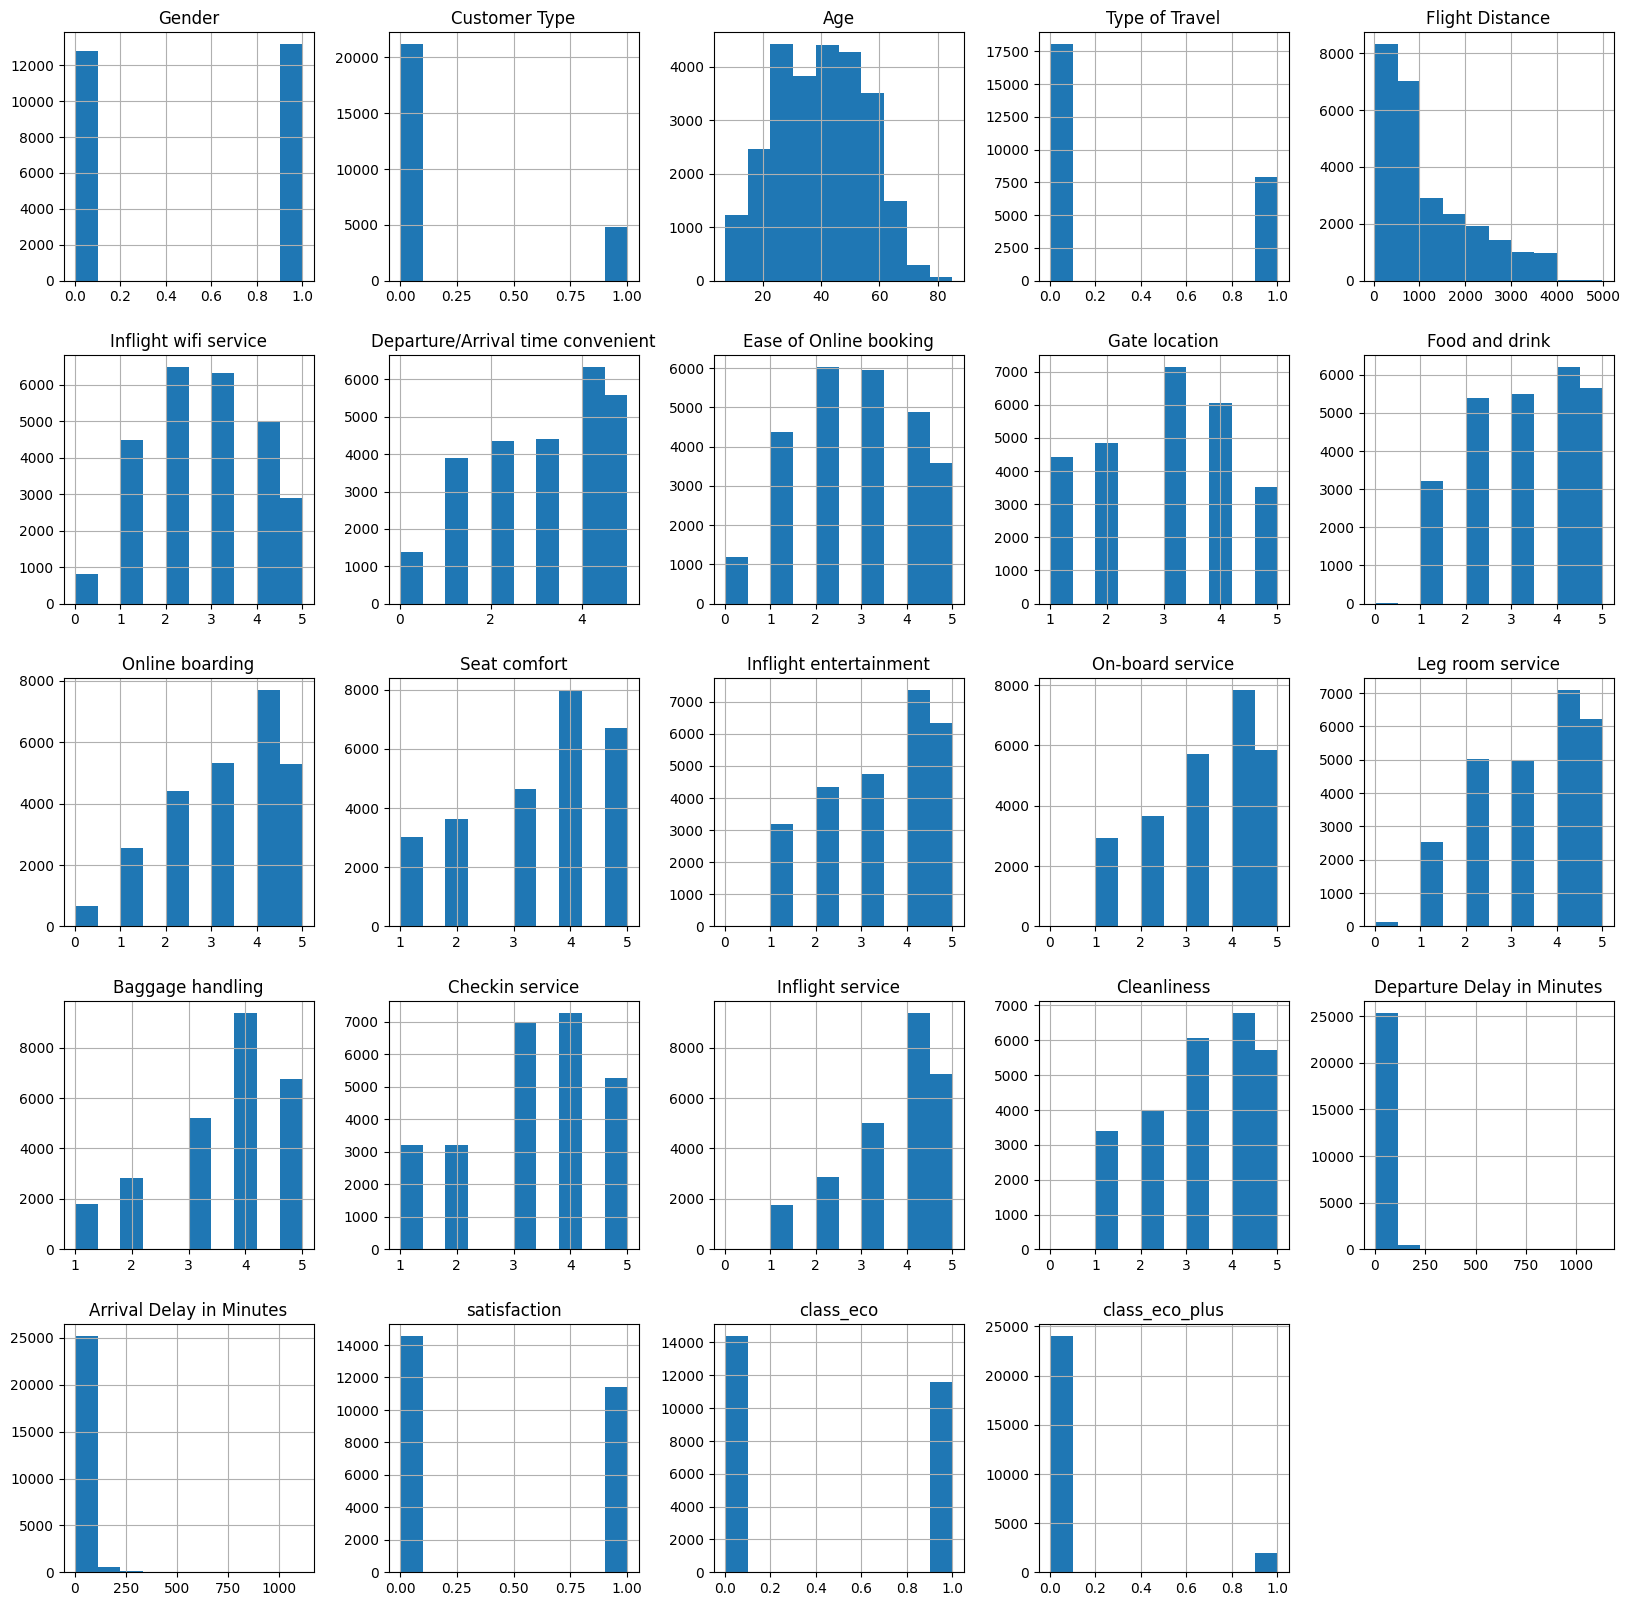

In [ ]:
testing.hist(figsize = (20,20))

In [ ]:
satisfaction_count = training.groupby('satisfaction')['satisfaction'].count()
satisfaction_count

,satisfaction
satisfaction,
0,58879
1,45025


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Gate location                      103904 non-null  int64  
 9   Food and drink                     103904 non-null  int64  
 10  Online boarding                    103904 non-null  int64  
 11  Seat comfort                       1039

# Handling Null Values

In [ ]:
print("Null values in the training data:\n\n", training.isnull().sum())

Null values in the training data:

 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
class_eco                              0
class_eco_plus       

In [ ]:
training.fillna(training.median(), inplace=True)

In [ ]:
print("Null values in the training data:\n\n", training.isnull().sum())

Null values in the training data:

 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
class_eco                            0
class_eco_plus                       0
dtype: int64


In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Flight Distance                    25976 non-null  int64  
 5   Inflight wifi service              25976 non-null  int64  
 6   Departure/Arrival time convenient  25976 non-null  int64  
 7   Ease of Online booking             25976 non-null  int64  
 8   Gate location                      25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Online boarding                    25976 non-null  int64  
 11  Seat comfort                       25976 non-null  int

In [ ]:
print("Null values in the testing data:\n\n", testing.isnull().sum())

Null values in the testing data:

 Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
class_eco                             0
class_eco_plus                        0
dtype

In [ ]:
testing.fillna(testing.median(), inplace=True)

In [ ]:
print("Null values in the testing data:\n\n", testing.isnull().sum())

Null values in the testing data:

 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
class_eco                            0
class_eco_plus                       0
dtype: int64


# Correlation Matrix - Before Preprocessing

Correlation matrix of the training set


<Axes: >

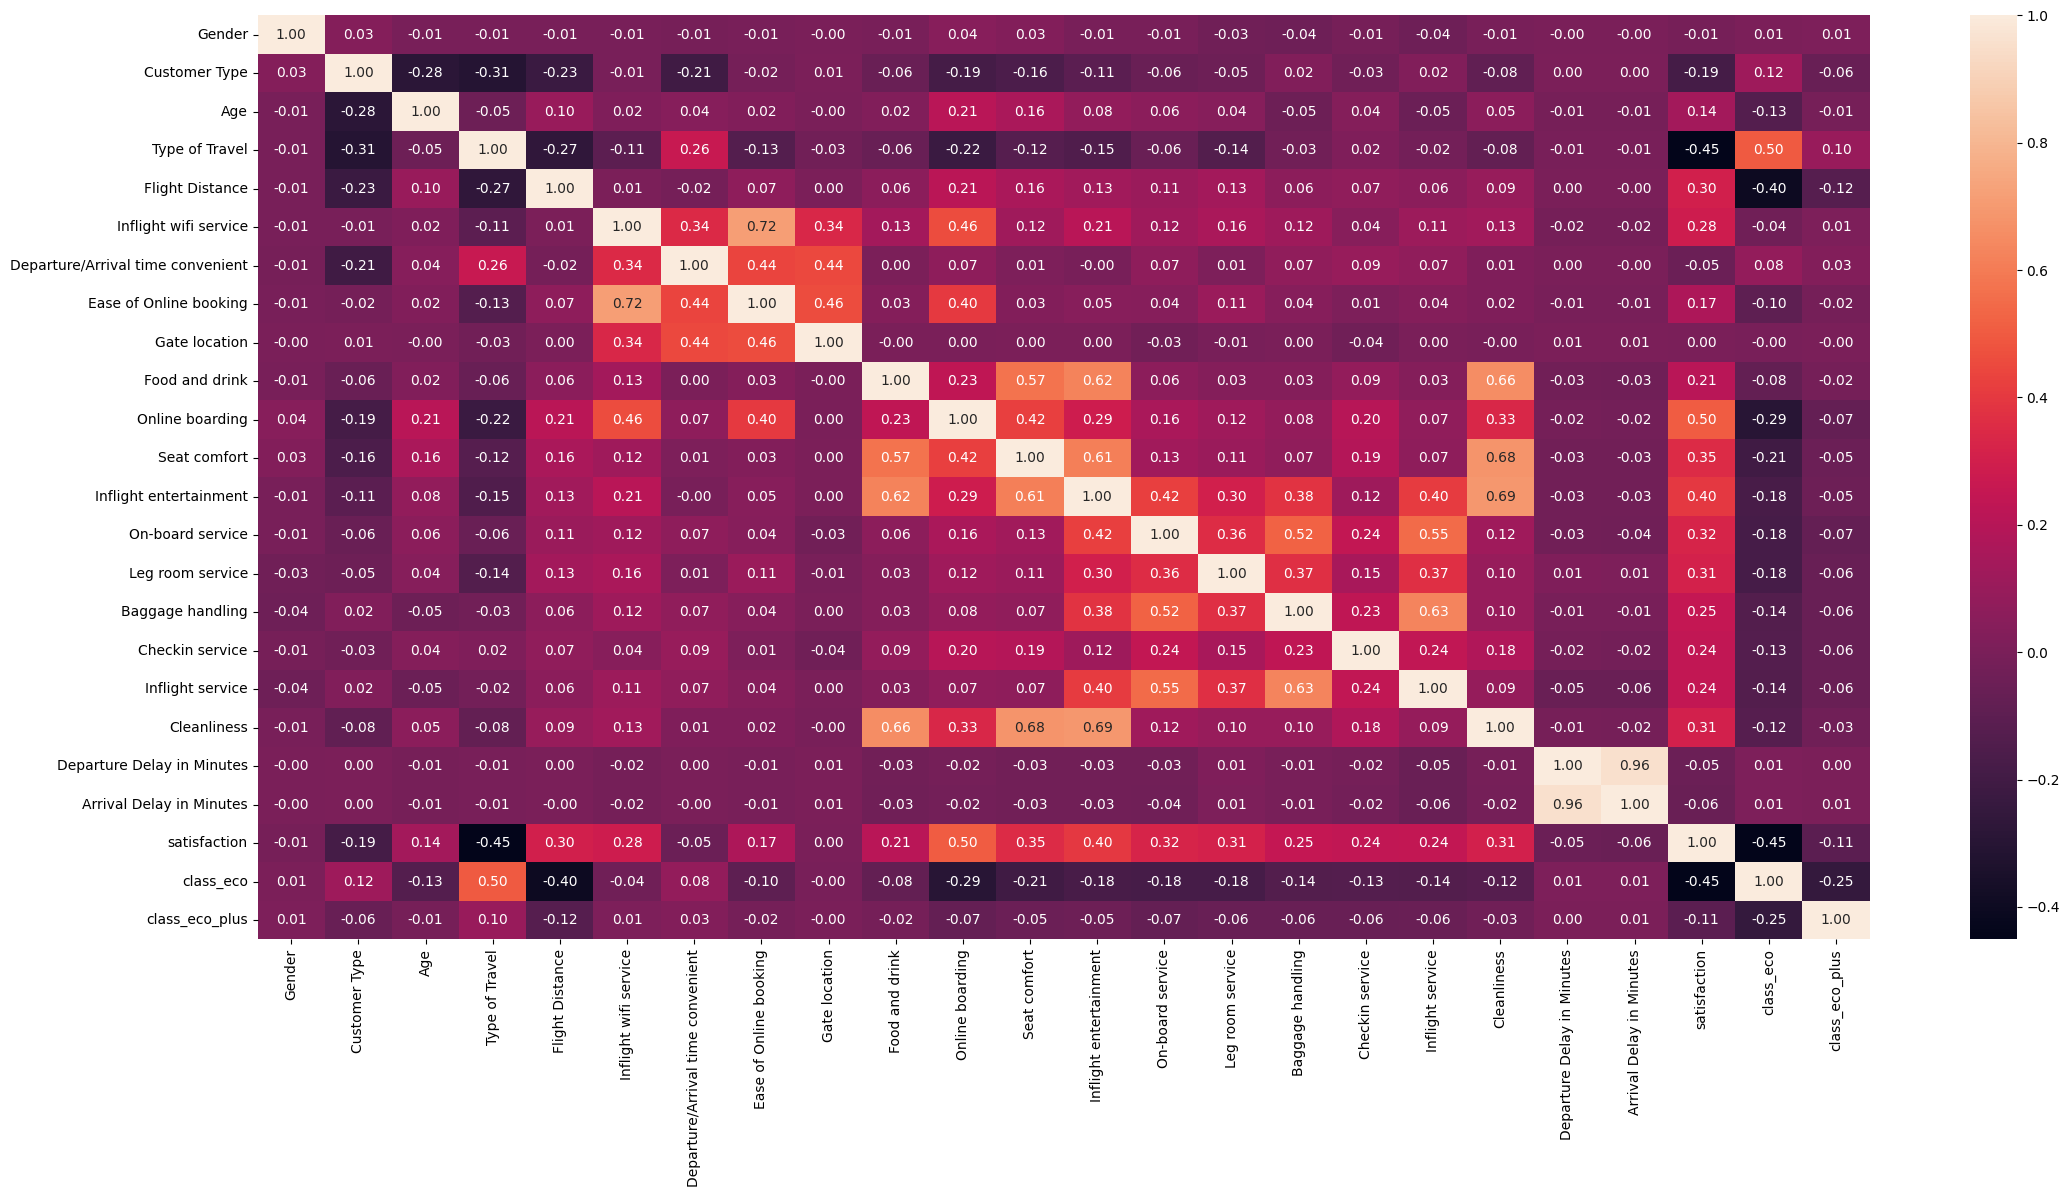

In [ ]:
print("Correlation matrix of the training set")
plt.figure(figsize=(26, 12))
sns.heatmap(training.corr(), annot=True,fmt=".2f")

Correlation matrix of the testing set


<Axes: >

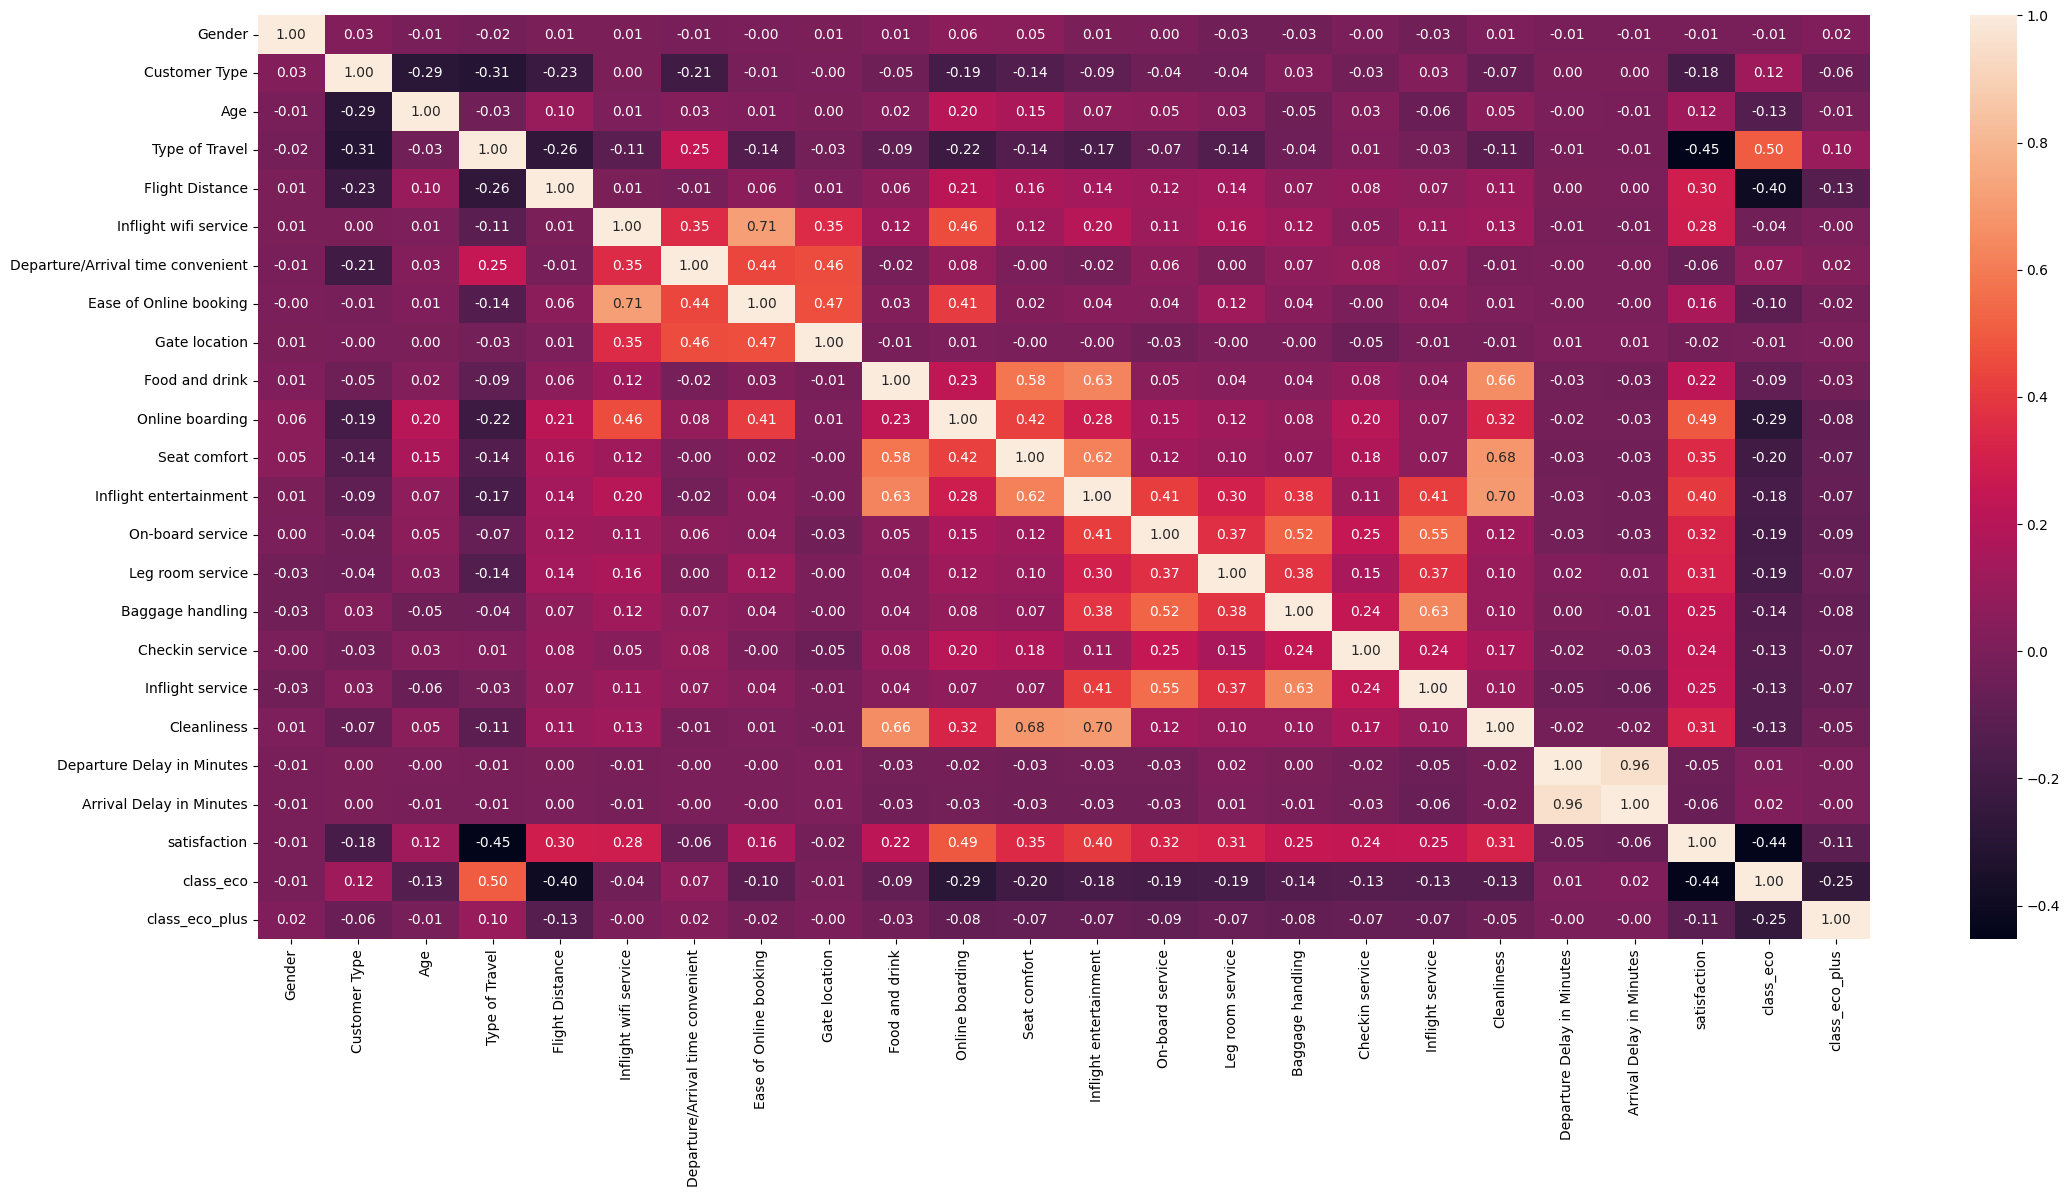

In [ ]:
print("Correlation matrix of the testing set")
plt.figure(figsize=(26, 12))
sns.heatmap(testing.corr(), annot=True,fmt=".2f")

In [ ]:
has_zero_or_negative_flight_distance_training = (training['Flight Distance'] <= 0).any()

if has_zero_or_negative_flight_distance_training:
    print("The column 'Flight Distance' in the training set contains zero or negative values.")
else:
    print("The column 'Flight Distance' in the training set does not contain any zero or negative values.")

The column 'Flight Distance' in the training set does not contain any zero or negative values.


In [ ]:
has_zero_or_negative_flight_distance_testing = (testing['Flight Distance'] <= 0).any()

if has_zero_or_negative_flight_distance_testing:
    print("The column 'Flight Distance' in the testing set contains zero or negative values.")
else:
    print("The column 'Flight Distance' in the testing set does not contain any zero or negative values.")

The column 'Flight Distance' in the testing set does not contain any zero or negative values.


In [ ]:
training['Flight Distance'] = np.log(training['Flight Distance'])
testing['Flight Distance'] = np.log(testing['Flight Distance'])

In [ ]:
has_zero_or_negative_departure_delay_training = (training['Departure Delay in Minutes'] <= 0).any()

if has_zero_or_negative_departure_delay_training:
    print("The column 'Departure Delay' in the training set contains zero or negative values.")
else:
    print("The column 'Departure Delay' in the training set does not contain any zero or negative values.")

The column 'Departure Delay' in the training set contains zero or negative values.


In [ ]:
has_zero_or_negative_departure_delay_testing = (testing['Departure Delay in Minutes'] <= 0).any()

if has_zero_or_negative_departure_delay_testing:
    print("The column 'Departure Delay' in the testing set contains zero or negative values.")
else:
    print("The column 'Departure Delay' in the testing set does not contain any zero or negative values.")

The column 'Departure Delay' in the testing set contains zero or negative values.


In [ ]:
training['Departure Delay in Minutes'] = training['Departure Delay in Minutes'] + 0.01
training['Departure Delay in Minutes'] = np.log(training['Departure Delay in Minutes'])


testing['Departure Delay in Minutes'] = testing['Departure Delay in Minutes'] + 0.01
testing['Departure Delay in Minutes'] = np.log(testing['Departure Delay in Minutes'])

In [ ]:
training.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class_eco,class_eco_plus
0,0,0,13,1,6.131226,3,4,3,1,5,...,3,4,4,5,5,3.219276,18.0,0,0,1
1,0,1,25,0,5.459586,3,2,3,3,1,...,5,3,1,4,1,0.009950,6.0,0,0,0
2,1,0,26,0,7.040536,2,2,2,2,5,...,3,4,4,4,5,-4.605170,0.0,1,0,0
3,1,0,25,0,6.331502,2,5,5,5,2,...,5,3,1,4,2,2.398804,9.0,0,0,0
4,0,0,61,0,5.365976,3,3,3,3,4,...,4,4,3,3,3,-4.605170,0.0,1,0,0


<Axes: >

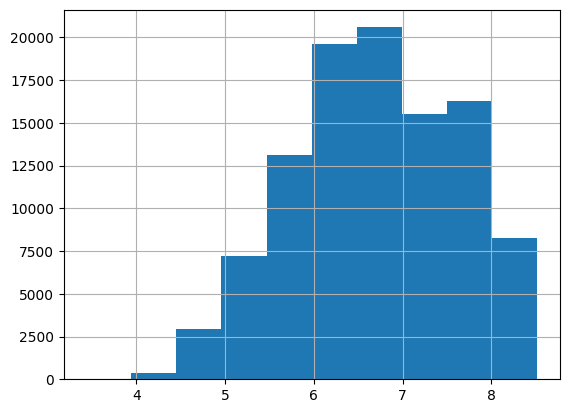

In [ ]:
training['Flight Distance'].hist()

<Axes: >

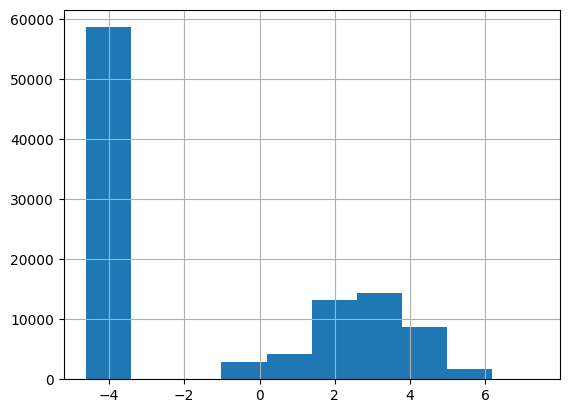

In [ ]:
training['Departure Delay in Minutes'].hist()

In [ ]:
scaler_distance = StandardScaler()
training['Flight Distance'] = scaler_distance.fit_transform(training[['Flight Distance']])
testing['Flight Distance'] = scaler_distance.transform(testing[['Flight Distance']])

In [ ]:
scaler_delay = StandardScaler()
training['Departure Delay in Minutes'] = scaler_delay.fit_transform(training[['Departure Delay in Minutes']])
testing['Departure Delay in Minutes'] = scaler_delay.transform(testing[['Departure Delay in Minutes']])

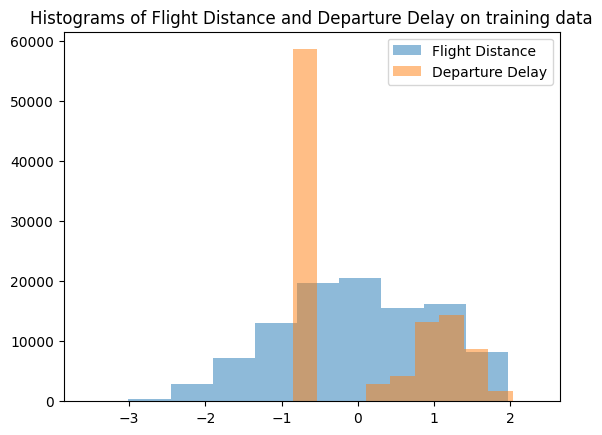

In [ ]:
plt.hist(training['Flight Distance'], alpha=0.5, label='Flight Distance')
plt.hist(training['Departure Delay in Minutes'], alpha=0.5, label='Departure Delay')
plt.title('Histograms of Flight Distance and Departure Delay on training data')
plt.legend()
plt.show()

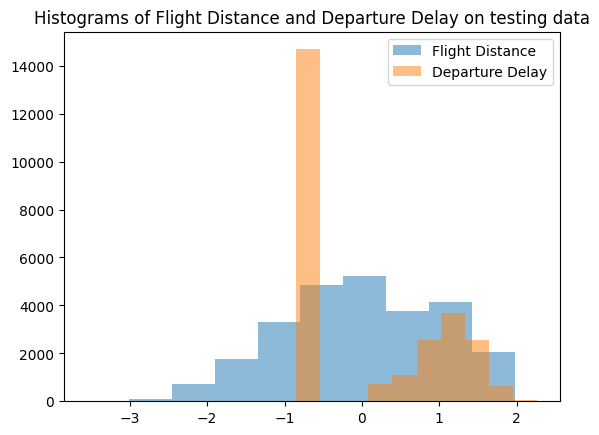

In [ ]:
plt.hist(testing['Flight Distance'], alpha=0.5, label='Flight Distance')
plt.hist(testing['Departure Delay in Minutes'], alpha=0.5, label='Departure Delay')
plt.title('Histograms of Flight Distance and Departure Delay on testing data')
plt.legend()
plt.show()

# Correlation Matrix - After Preprocessing

Correlation matrix of the training set after the preprocessing


<Axes: >

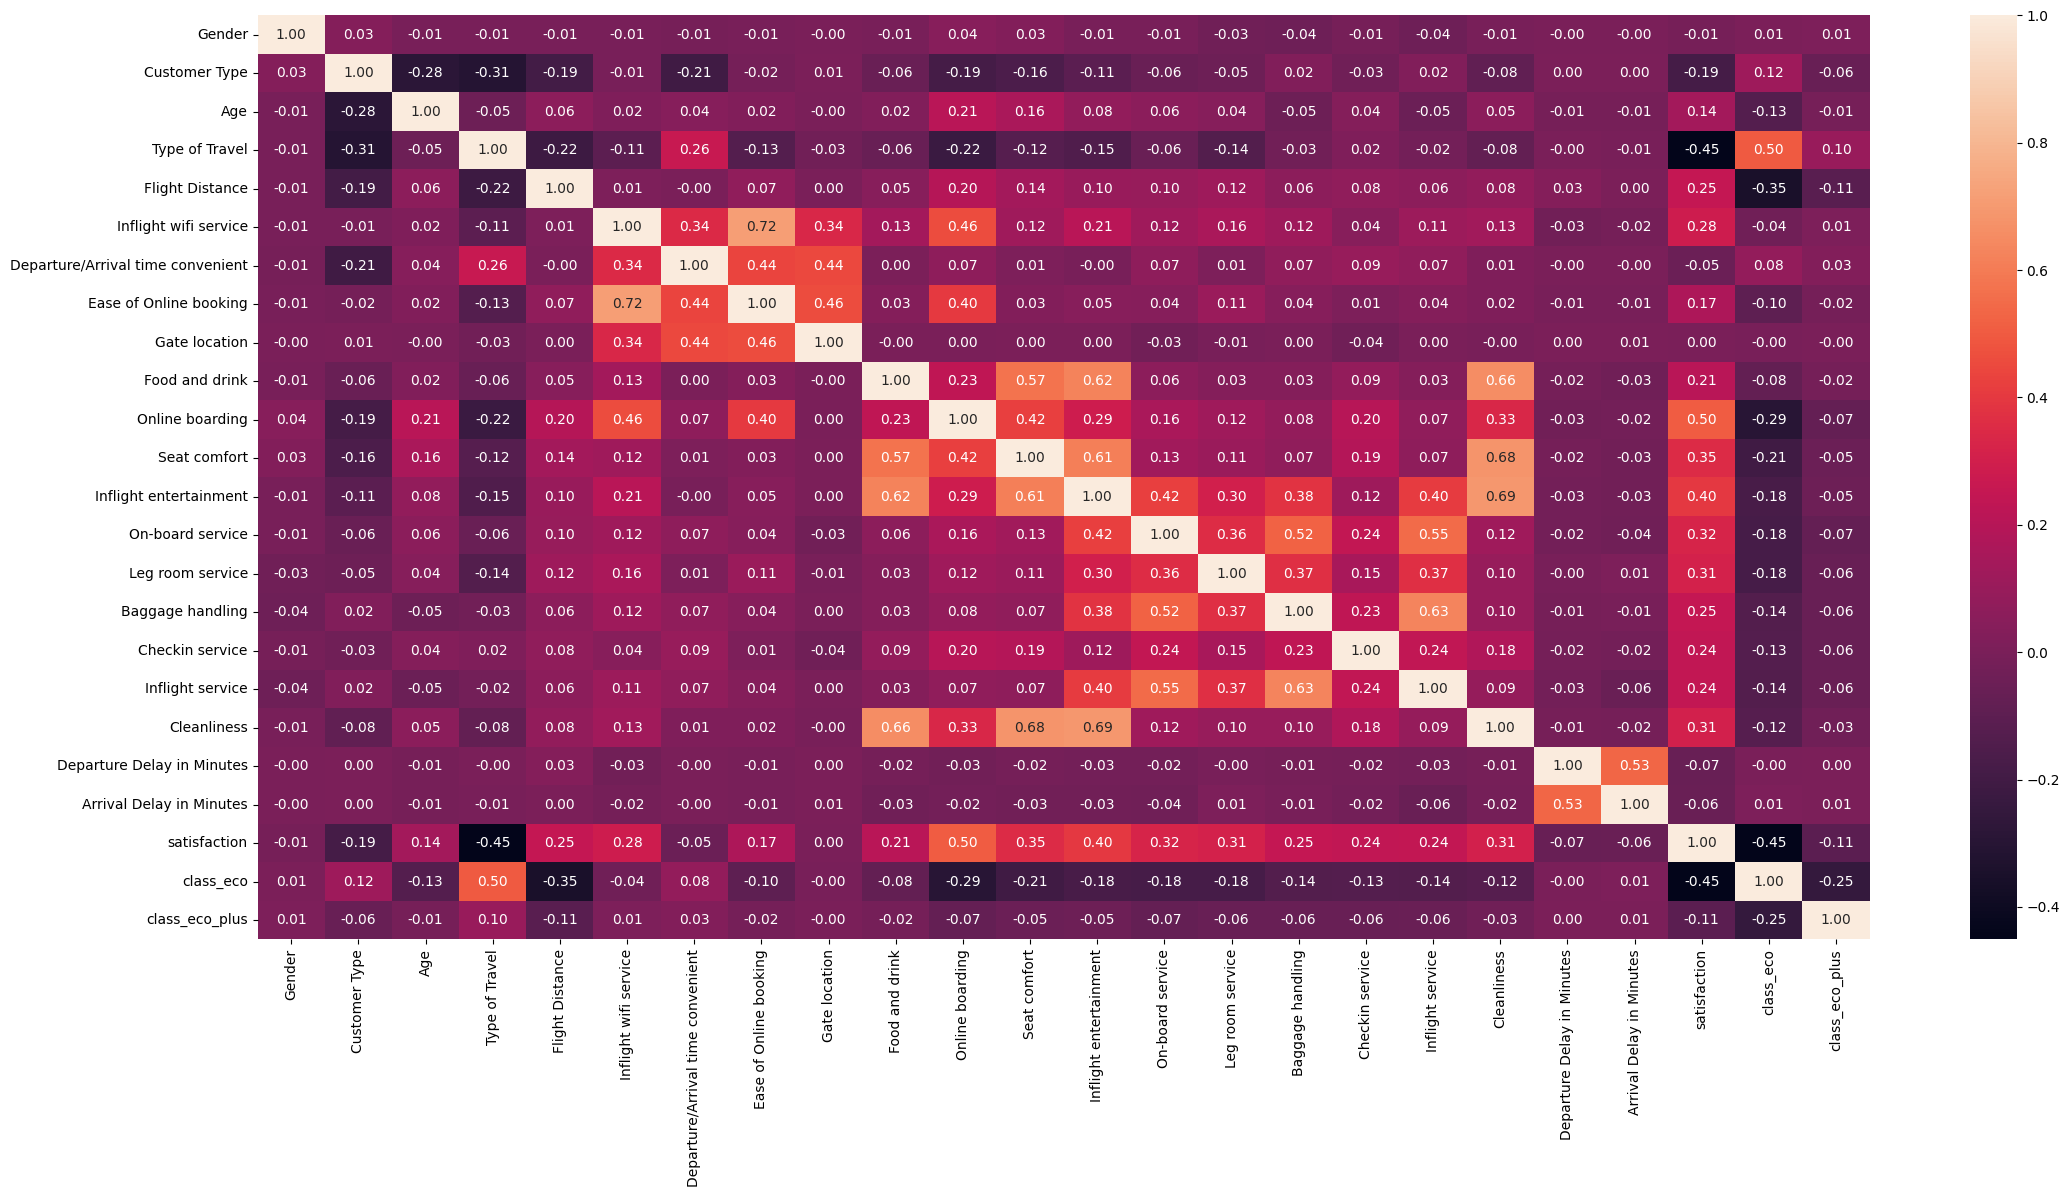

In [ ]:
print("Correlation matrix of the training set after the preprocessing")
plt.figure(figsize=(26, 12))
sns.heatmap(training.corr(), annot=True,fmt=".2f")

# Feature Engineering

In [ ]:
training = training.drop('Arrival Delay in Minutes', axis=1)
testing = testing.drop('Arrival Delay in Minutes', axis=1)

In [ ]:
X_train = training.drop('satisfaction', axis=1)
y_train = training['satisfaction']

X_test = testing.drop('satisfaction', axis=1)
y_test = testing['satisfaction']

In [ ]:
X_train

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,class_eco,class_eco_plus
0,0,0,13,1,-0.624110,3,4,3,1,5,...,5,4,3,4,4,5,5,1.242658,0,1
1,0,1,25,0,-1.356305,3,2,3,3,1,...,1,1,5,3,1,4,1,0.383385,0,0
2,1,0,26,0,0.367182,2,2,2,2,5,...,5,4,3,4,4,4,5,-0.852279,0,0
3,1,0,25,0,-0.405778,2,5,5,5,2,...,2,2,5,3,1,4,2,1.022983,0,0
4,0,0,61,0,-1.458354,3,3,3,3,4,...,3,3,4,4,3,3,3,-0.852279,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,23,0,-1.576615,2,1,2,3,2,...,2,3,1,4,2,3,2,0.675757,1,0
103900,0,0,49,0,1.152485,4,4,4,4,2,...,5,5,5,5,5,5,4,-0.852279,0,0
103901,0,1,30,0,0.975341,1,1,1,3,4,...,4,3,2,4,5,5,4,0.902106,0,0
103902,1,1,22,0,0.222430,1,1,1,5,1,...,1,4,5,1,5,4,1,-0.852279,1,0


In [ ]:
y_train

,satisfaction
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [ ]:
X_test

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,class_eco,class_eco_plus
0,1,0,52,0,-1.775374,5,4,3,4,3,...,5,5,5,5,2,5,5,1.428190,1,0
1,1,0,36,0,1.369135,1,1,3,1,5,...,4,4,4,4,3,4,5,-0.852279,0,0
2,0,1,20,0,-1.576615,2,0,2,4,2,...,2,4,1,3,2,2,2,-0.852279,1,0
3,0,0,44,0,1.549139,0,0,0,2,3,...,1,1,1,1,3,1,4,-0.852279,0,0
4,1,0,49,0,0.404713,2,3,4,3,4,...,2,2,2,2,4,2,4,-0.852279,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,0,-0.477947,3,3,3,1,4,...,4,3,2,4,4,5,4,-0.852279,0,0
25972,0,0,23,0,-0.253921,4,4,4,4,4,...,4,4,5,5,5,5,4,-0.852279,0,0
25973,1,0,17,1,0.016671,2,5,1,5,2,...,2,4,3,4,5,4,2,-0.852279,1,0
25974,0,0,14,0,0.352768,3,3,3,3,4,...,4,3,2,5,4,5,4,-0.852279,0,0


In [ ]:
y_test

,satisfaction
0,1
1,1
2,0
3,1
4,1
...,...
25971,0
25972,1
25973,0
25974,1


Load Test

# Decision Tree


In [ ]:
opt_tree = DecisionTreeClassifier(random_state = 0 )
dt_params = {'max_depth':   range(2,11)
             }
dt_scoring = {'accuracy': 'accuracy',
          'precision': make_scorer(precision_score, average='weighted', zero_division=0),
          'recall': make_scorer(recall_score, average='weighted'),
          'roc_auc': 'roc_auc'}

grid_tree = GridSearchCV(opt_tree, dt_params, scoring=dt_scoring, refit="accuracy")
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 11)}, refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted, zero_division=0),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted),
                      'roc_auc': 'roc_auc'})

In [ ]:
print("Best parameters for a Decision Tree model:", grid_tree.best_params_)
print("Best cross-validation ROC AUC for a Decision Tree model:", grid_tree.best_score_)
print("Best cross-validation accuracy for a Decision Tree model:", grid_tree.cv_results_['mean_test_accuracy'][grid_tree.best_index_])
print("Best cross-validation precision for a Decision Tree model:", grid_tree.cv_results_['mean_test_precision'][grid_tree.best_index_])
print("Best cross-validation recall for a Decision Tree model:", grid_tree.cv_results_['mean_test_recall'][grid_tree.best_index_])

Best parameters for a Decision Tree model: {'max_depth': 10}
Best cross-validation ROC AUC for a Decision Tree model: 0.9414363323015827
Best cross-validation accuracy for a Decision Tree model: 0.9414363323015827
Best cross-validation precision for a Decision Tree model: 0.9416384629353516
Best cross-validation recall for a Decision Tree model: 0.9414363323015827


In [ ]:
best_params = grid_tree.best_params_

In [ ]:
final_dt_model = DecisionTreeClassifier(**best_params)
final_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
print(f"Decision Tree accuracy on the training set: {final_dt_model.score(X_train,y_train)*100:.2f}%")
print(f"Decision Tree accuracy on the testing set: {final_dt_model.score(X_test, y_test)*100:.2f}%")

Decision Tree accuracy on the training set: 94.71%
Decision Tree accuracy on the testing set: 94.28%


In [ ]:
y_pred_train = final_dt_model.predict(X_train)
y_pred_test = final_dt_model.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_test), recall_score(y_test, y_pred_test)


(0.9441110613524407, 0.9244058581075155)

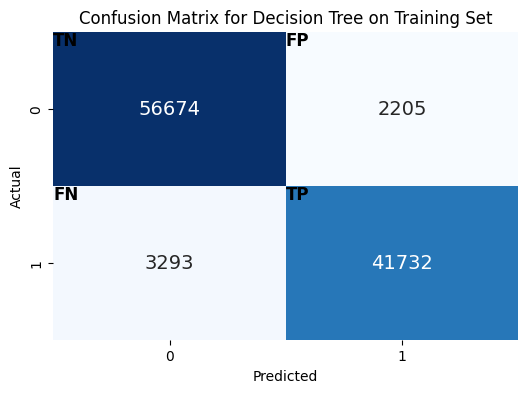

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Decision Tree on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

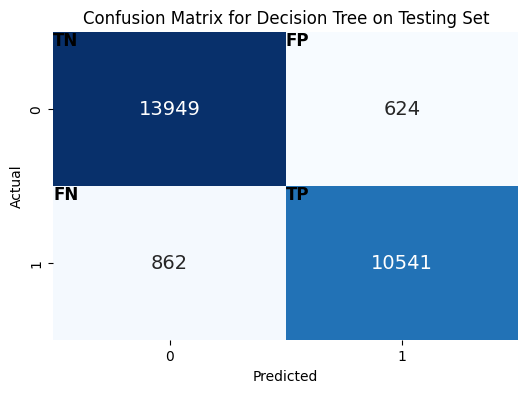

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Decision Tree on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=20000)

In [ ]:
""" param_space = [
    # L1 regularization
    {
        'penalty': ['l1'],
        'C': (1e-4, 1e+2, 'log-uniform'),
        'tol': (1e-4, 1e-1, 'uniform'),
        'solver': ['saga'],
    },

    # L2 regularization
    {
        'penalty': ['l2'],
        'C': (1e-4, 1e+2, 'log-uniform'),
        'tol': (1e-4, 1e-1, 'uniform'),
        'solver': ['lbfgs', 'saga'],
    },

    # ElasticNet
    {
        'penalty': ['elasticnet'],
        'C': (1e-4, 1e+2, 'log-uniform'),
        'tol': (1e-4, 1e-1, 'uniform'),
        'solver': ['saga'],
        'l1_ratio': (0, 1, 'uniform')
    }
    ]

scoring = {'accuracy': 'accuracy',
          'precision': make_scorer(precision_score, average='weighted', zero_division=0),
          'recall': make_scorer(recall_score, average='weighted'),
          'roc_auc': 'roc_auc'}

bayes_search = BayesSearchCV(estimator=log_reg,
                             search_spaces=param_space,
                             n_iter=20,
                             cv=5,
                             n_jobs=-1,
                             scoring=scoring,
                             refit='accuracy',
                             verbose=1)

bayes_search.fit(X_train, y_train) """

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=LogisticRegression(max_iter=20000), n_iter=20,
              n_jobs=-1, refit='accuracy',
              scoring={'accuracy': 'accuracy',
                       'precision': make_scorer(precision_score, response_method='predict', average=weighted, zero_division=0),
                       'recall': make_scorer(recall_score, response_method='predict', average=weighted),
                       'roc_auc': 'roc_auc'},
              search_spaces=[{'C': (0.0001, 100.0, 'log-uniform'),
                              'penalty': ['l1'], 'solver': ['saga'],
                              'tol': (0.0001, 0.1, 'uniform')},
                             {'C': (0.0001, 100.0, 'log-uniform'),
                              'penalty': ['l2'], 'solver': ['lbfgs', 'saga'],
                              'tol': (0.0001, 0.1, 'uniform')},
                             {'C': (0.0001, 100.0, 'log-uniform'),
                              'l1_ratio': (0, 1, 'uniform'),
                              'penalty': ['elasticnet'], 'solver': ['saga'],
                              'tol': (0.0001, 0.1, 'uniform')}],
              verbose=1)

In [ ]:
""" print("Best parameters for a Logistic Regression model:", bayes_search.best_params_)
print("Best cross-validation ROC AUC for a Logistic Regression model:", bayes_search.best_score_)
print("Best cross-validation accuracy for a Logistic Regression model:", bayes_search.cv_results_['mean_test_accuracy'][bayes_search.best_index_])
print("Best cross-validation precision for a Logistic Regression model:", bayes_search.cv_results_['mean_test_precision'][bayes_search.best_index_])
print("Best cross-validation recall for a Logistic Regression model:", bayes_search.cv_results_['mean_test_recall'][bayes_search.best_index_])"""

Best parameters for a Logistic Regression model: OrderedDict([('C', 0.003415933295663869), ('penalty', 'l1'), ('solver', 'saga'), ('tol', 0.0005308118692534654)])
Best cross-validation ROC AUC for a Logistic Regression model: 0.8749326782409655
Best cross-validation accuracy for a Logistic Regression model: 0.8749326782409655
Best cross-validation precision for a Logistic Regression model: 0.8748396211555838
Best cross-validation recall for a Logistic Regression model: 0.8749326782409655


In [ ]:
"""best_params = bayes_search.best_params_
final_logistic_model = LogisticRegression(**best_params)
final_logistic_model.fit(X_train, y_train)"""

LogisticRegression(C=0.003415933295663869, penalty='l1', solver='saga',
                   tol=0.0005308118692534654)

In [ ]:
# dump(final_logistic_model, 'Logistic_Regression.joblib') # Saving the model

['Logistic_Regression.joblib']

In [ ]:
final_logistic_model = load('/content/drive/MyDrive/AML/Models/Logistic_Regression.joblib') # Loading the model

In [ ]:
print(f"Logistic Regression accuracy on the training set: {final_logistic_model.score(X_train,y_train)*100:.2f}%")
print(f"Logistic Regression accuracy on the testing set: {final_logistic_model.score(X_test, y_test)*100:.2f}%")

Logistic Regression accuracy on the training set: 87.51%
Logistic Regression accuracy on the testing set: 87.23%


In [ ]:
y_pred_train_lr = final_logistic_model.predict(X_train)
y_pred_test_lr = final_logistic_model.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_test_lr), recall_score(y_test, y_pred_test_lr)


(0.8702499771083234, 0.8334648776637726)

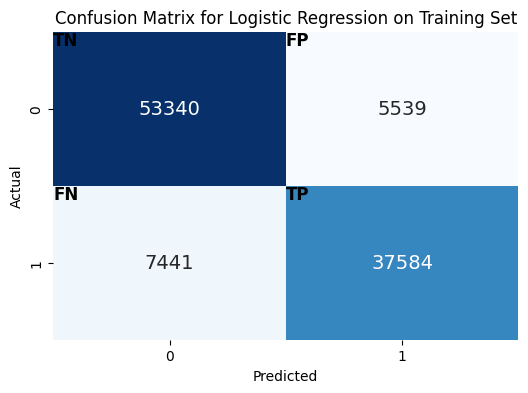

In [ ]:
cm = confusion_matrix(y_train, y_pred_train_lr)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Logistic Regression on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

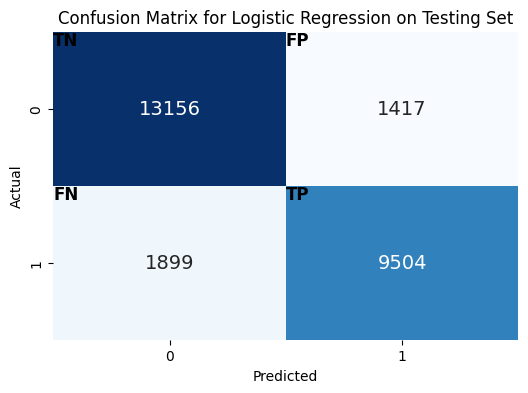

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_lr)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Logistic Regression on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [ ]:
# Linear SVM

In [ ]:
selected_features = ['Type of Travel', 'Online boarding', 'Inflight entertainment','Seat comfort','On-board service']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
X_train_selected.head()

,Type of Travel,Online boarding,Inflight entertainment,Seat comfort,On-board service
0,1,3,5,5,4
1,0,3,1,1,1
2,0,5,5,5,4
3,0,2,2,2,2
4,0,5,3,5,3


In [ ]:
X_test_selected.head()

,Type of Travel,Online boarding,Inflight entertainment,Seat comfort,On-board service
0,0,4,5,3,5
1,0,4,4,5,4
2,0,2,2,2,4
3,0,4,1,4,1
4,0,1,2,2,2


In [ ]:
lr_svc = LinearSVC(C=0.001, random_state=0)

lr_svc.fit(X_train_selected, y_train)


LinearSVC(C=0.001, random_state=0)

In [ ]:
print(f"Linear SVM accuracy on the training set: {lr_svc.score(X_train_selected,y_train)*100:.2f}%")
print(f"Linear SVM accuracy on the testing set: {lr_svc.score(X_test_selected, y_test)*100:.2f}%")

Linear SVM accuracy on the training set: 84.15%
Linear SVM accuracy on the testing set: 83.94%


In [ ]:
y_pred_train_linear = lr_svc.predict(X_train_selected)
y_pred_test_linear = lr_svc.predict(X_test_selected)

In [ ]:
precision_score(y_test, y_pred_test_linear), recall_score(y_test, y_pred_test_linear)

(0.8155873625414557, 0.8195211786372008)

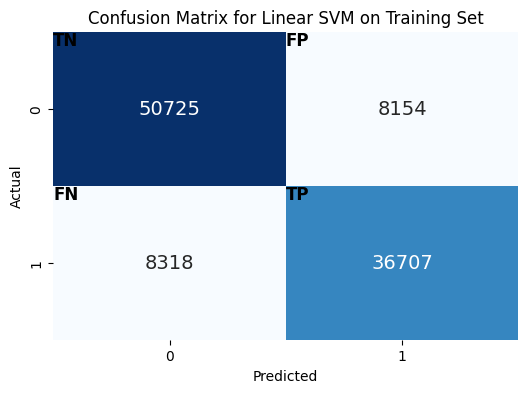

In [ ]:
cm = confusion_matrix(y_train, y_pred_train_linear)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Linear SVM on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

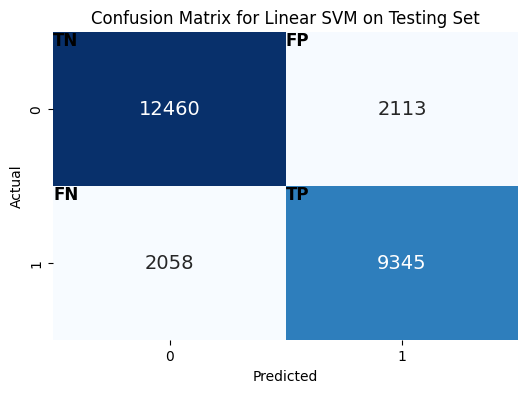

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_linear)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Linear SVM on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Kernel SVM

In [ ]:
kernel_svm = SVC(C=1, gamma=0.1, random_state=0) # fitting the model on the best hyperparameters.
kernel_svm.fit(X_train_selected, y_train)

SVC(C=1, gamma=0.1, random_state=0)

In [ ]:
print(f"Kernel SVM accuracy on the training set: {kernel_svm.score(X_train_selected, y_train)*100:.2f}%")
print(f"Kernel SVM accuracy on the testing set: {kernel_svm.score(X_test_selected, y_test)*100:.2f}%")

Kernel SVM accuracy on the training set: 88.73%
Kernel SVM accuracy on the testing set: 88.72%


In [ ]:
y_pred_train_kernel = kernel_svm.predict(X_train_selected)
y_pred_test_kernel = kernel_svm.predict(X_test_selected)

In [ ]:
precision_score(y_test, y_pred_test_kernel), recall_score(y_test, y_pred_test_kernel)

(0.8938464398587098, 0.8432868543365781)

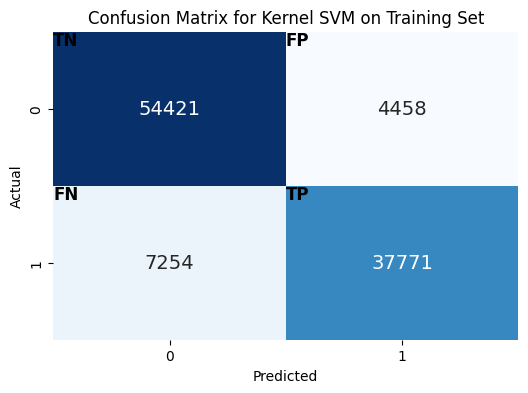

In [ ]:
cm = confusion_matrix(y_train, y_pred_train_kernel)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Kernel SVM on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

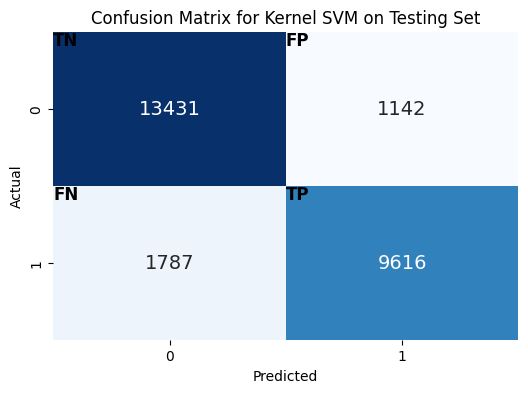

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_kernel)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Kernel SVM on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K Nearest Neighbors


In [ ]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(3, 10, 2)}

scoring = {'accuracy': 'accuracy',
          'precision': make_scorer(precision_score, average='weighted', zero_division=0),
          'recall': make_scorer(recall_score, average='weighted'),
          'roc_auc': 'roc_auc'}

grid_knn = GridSearchCV(knn, param_knn, scoring = scoring, cv = 5, refit = "accuracy")
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 10, 2)}, refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted, zero_division=0),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted),
                      'roc_auc': 'roc_auc'})

In [ ]:
print("Best parameters for a KNN model:", grid_knn.best_params_)
print("Best cross-validation ROC AUC for a KNN model:", grid_knn.best_score_)
print("Best cross-validation accuracy for a KNN model:", grid_knn.cv_results_['mean_test_accuracy'][grid_knn.best_index_])
print("Best cross-validation precision for a KNN model:", grid_knn.cv_results_['mean_test_precision'][grid_knn.best_index_])
print("Best cross-validation recall for a KNN model:", grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_])

Best parameters for a KNN model: {'n_neighbors': 9}
Best cross-validation ROC AUC for a KNN model: 0.910253734126999
Best cross-validation accuracy for a KNN model: 0.910253734126999
Best cross-validation precision for a KNN model: 0.9110671582235067
Best cross-validation recall for a KNN model: 0.910253734126999


In [ ]:
best_params_KNN = grid_knn.best_params_
final_KNN_model = KNeighborsClassifier(**best_params_KNN)
final_KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
print(f"Logistic Regression accuracy on the training set: {final_KNN_model.score(X_train,y_train)*100:.2f}%")
print(f"Logistic Regression accuracy on the testing set: {final_KNN_model.score(X_test, y_test)*100:.2f}%")

Logistic Regression accuracy on the training set: 92.78%
Logistic Regression accuracy on the testing set: 91.04%


In [ ]:
y_pred_train_knn = final_KNN_model.predict(X_train)
y_pred_test_knn = final_KNN_model.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_test_knn), recall_score(y_test, y_pred_test_knn)

(0.9267444047395148, 0.8642462509865825)

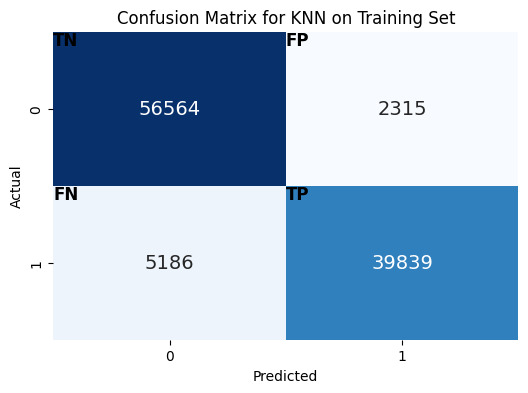

In [ ]:
cm = confusion_matrix(y_train, y_pred_train_knn)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for KNN on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

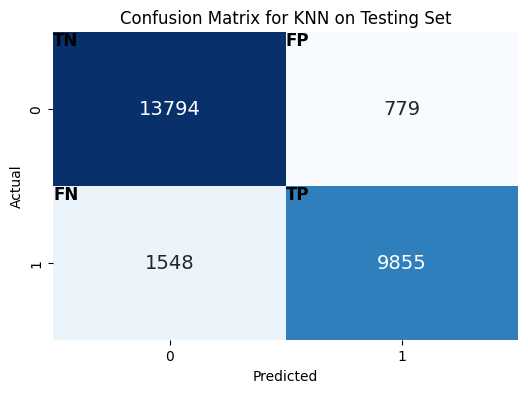

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_knn)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for KNN on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Ensemble Modeling - Random Forest


In [ ]:
"""search_space = {
    'max_depth': [10, 20, 25, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
    }

scoring = {'accuracy': 'accuracy',
          'precision': make_scorer(precision_score, average='weighted', zero_division=0),
          'recall': make_scorer(recall_score, average='weighted'),
          'roc_auc': 'roc_auc'
          }

#grid_search_random = GridSearchCV(RandomForestClassifier(), param_grid, scoring=scoring, refit='accuracy')
bayes_search_random = BayesSearchCV(estimator=RandomForestClassifier(random_state = 42),
                             search_spaces=search_space,
                             n_iter=20,
                             cv=5,
                             n_jobs=-1,
                             scoring=scoring,
                             refit='accuracy',
                             verbose=1)
bayes_search_random.fit(X_train, y_train)"""

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [2, 5] was inferred to Integer(low=2, high=5, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(2, 5), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [1, 2] was inferred to Integer(low=1, high=2, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1, 2), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:116: UserWarning: Dimension [1, 2] was inferred to Integer(low=1, high=2, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categoric

KeyboardInterrupt: 

In [ ]:
"""print("Best parameters for a Random Forest model:", bayes_search_random.best_params_)
print("Best cross-validation ROC AUC for a Random Forest model:", bayes_search_random.best_score_)
print("Best cross-validation accuracy for a Random Forest model:", bayes_search_random.cv_results_['mean_test_accuracy'][bayes_search_random.best_index_])
print("Best cross-validation precision for a Random Forest model:", bayes_search_random.cv_results_['mean_test_precision'][bayes_search_random.best_index_])
print("Best cross-validation recall for a Random Forest model:", bayes_search_random.cv_results_['mean_test_recall'][bayes_search_random.best_index_])"""

Best parameters for a Random Forest model: OrderedDict([('max_depth', 25), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 5)])
Best cross-validation ROC AUC for a Random Forest model: 0.9621958784721312
Best cross-validation accuracy for a Random Forest model: 0.9621958784721312
Best cross-validation precision for a Random Forest model: 0.9624262400178019
Best cross-validation recall for a Random Forest model: 0.9621958784721312


In [ ]:
"""best_params_random = bayes_search_random.best_params_
final_RF_model = RandomForestClassifier(**best_params_random)
final_RF_model.fit(X_train, y_train)"""

RandomForestClassifier(max_depth=25, min_samples_split=5)

In [ ]:
# dump(final_RF_model, 'Random_Forest.joblib') # Saving the model

['Random_Forest.joblib']

In [ ]:
final_RF_model = load('/content/drive/MyDrive/AML/Models/Random_Forest.joblib') # Loading the model

In [ ]:
print(f"Random Forest accuracy on the training set: {final_RF_model.score(X_train,y_train)*100:.2f}%")
print(f"Random Forest accuracy on the testing set: {final_RF_model.score(X_test, y_test)*100:.2f}%")

Random Forest accuracy on the training set: 99.41%
Random Forest accuracy on the testing set: 96.36%


In [ ]:
#y_pred_train_rf = final_RF_model.predict(X_train)
y_pred_test_rf = final_RF_model.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_test_rf), recall_score(y_test, y_pred_test_rf)

(0.9725284655702151, 0.9437867227922476)

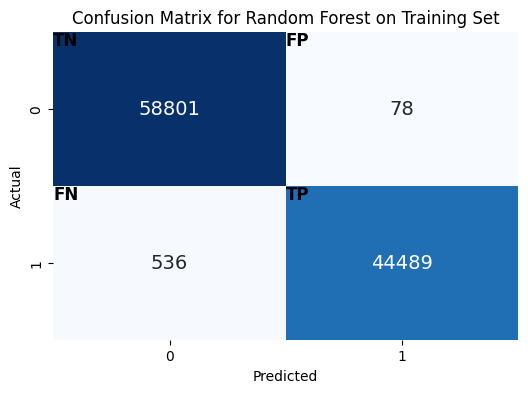

In [ ]:
cm = confusion_matrix(y_train, y_pred_train_rf)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Random Forest on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

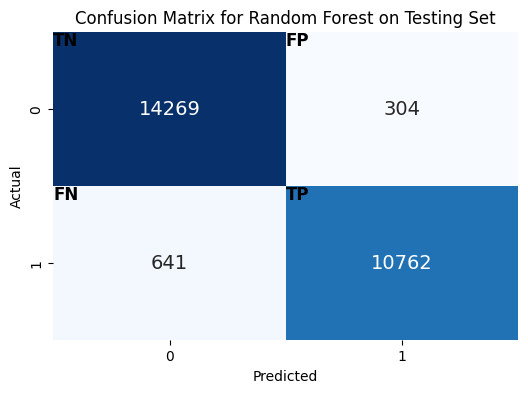

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Random Forest on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Ensemble Modeling - Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

"""ensemble_model = VotingClassifier(estimators=[
    ('Model1_Logistic', final_logistic_model),
    ('Model2_RandomForest', final_RF_model),
    ('Model3_KNN', final_KNN_model),
    ('Model4_DecisionTree', final_dt_model),
    ('Model5_KernelSVM', kernel_svm)],
    voting='hard')

ensemble_model.fit(X_train, y_train)"""

VotingClassifier(estimators=[('Model1_Logistic',
                              LogisticRegression(C=0.003415933295663869,
                                                 penalty='l1', solver='saga',
                                                 tol=0.0005308118692534654)),
                             ('Model2_RandomForest',
                              RandomForestClassifier(max_depth=25,
                                                     min_samples_split=5)),
                             ('Model3_KNN',
                              KNeighborsClassifier(n_neighbors=9)),
                             ('Model4_DecisionTree',
                              DecisionTreeClassifier(max_depth=10)),
                             ('Model5_KernelSVM',
                              SVC(C=1, gamma=0.1, random_state=0))])

In [ ]:
# dump(ensemble_model, 'Ensemble.joblib') # Saving the model

['Ensemble.joblib']

In [ ]:
ensemble_model = load('/content/drive/MyDrive/AML/Models/Ensemble.joblib')

In [ ]:
print(f"Ensemble model accuracy on the training set: {ensemble_model.score(X_train,y_train)*100:.2f}%")
print(f"Ensemble model accuracy on the testing set: {ensemble_model.score(X_test, y_test)*100:.2f}%")

Ensemble model accuracy on the training set: 96.98%
Ensemble model accuracy on the testing set: 95.03%


In [ ]:
y_pred_train_ensemble = ensemble_model.predict(X_train)
y_pred_test_ensemble = ensemble_model.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_test_ensemble), recall_score(y_test, y_pred_test_ensemble)

(0.9618160226546085, 0.9233535034640007)

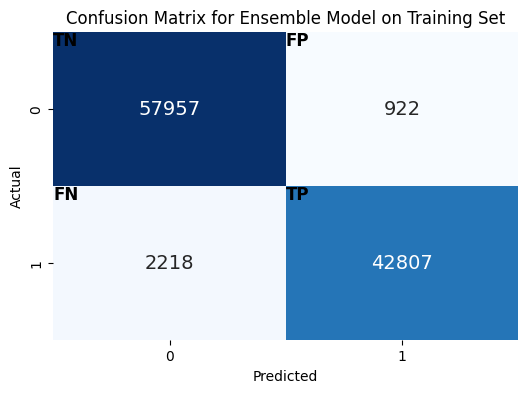

In [ ]:
cm = confusion_matrix(y_train, y_pred_train_ensemble)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Ensemble Model on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

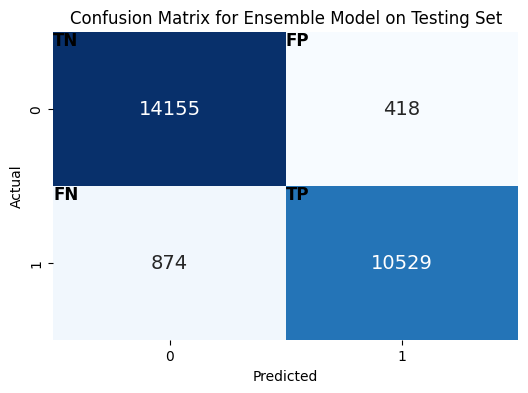

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_ensemble)

plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})

ax.text(0, 0, 'TN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(0, 1, 'FN', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, 'FP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')
ax.text(1, 1, 'TP', color='black', ha='left', va='top', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix for Ensemble Model on Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()